<a href="https://colab.research.google.com/github/YusairahYamany/Flower_Image_Classifier/blob/main/oxford_flowers102_yusairah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds 

## Import datasets

In [2]:
# train dataset
train_ds, info = tfds.load('oxford_flowers102', split='train', with_info=True, as_supervised=True)

# validation dataset
val_ds, test_info = tfds.load('oxford_flowers102', split='test', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete9I6G5M/oxford_flowers102-train.tfrecord*...:…

Generating test examples...:   0%|          | 0/6149 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete9I6G5M/oxford_flowers102-test.tfrecord*...: …

Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/oxford_flowers102/2.1.1.incomplete9I6G5M/oxford_flowers102-validation.tfrecord…

Dataset oxford_flowers102 downloaded and prepared to ~/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Display datasets

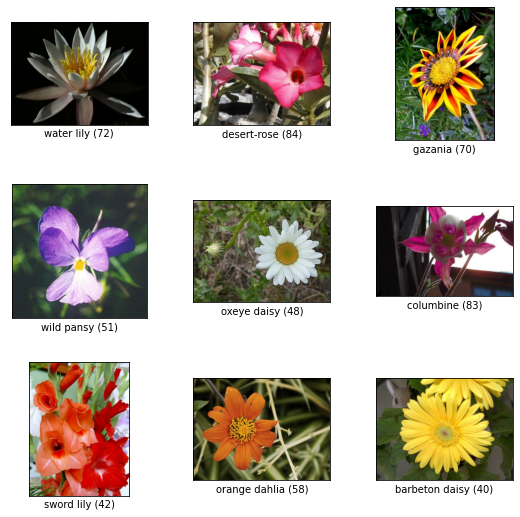

In [3]:
fig = tfds.show_examples(train_ds, info) 

In [4]:
label_names = info.features['label'].names 
label_names

['pink primrose',
 'hard-leaved pocket orchid',
 'canterbury bells',
 'sweet pea',
 'english marigold',
 'tiger lily',
 'moon orchid',
 'bird of paradise',
 'monkshood',
 'globe thistle',
 'snapdragon',
 "colt's foot",
 'king protea',
 'spear thistle',
 'yellow iris',
 'globe-flower',
 'purple coneflower',
 'peruvian lily',
 'balloon flower',
 'giant white arum lily',
 'fire lily',
 'pincushion flower',
 'fritillary',
 'red ginger',
 'grape hyacinth',
 'corn poppy',
 'prince of wales feathers',
 'stemless gentian',
 'artichoke',
 'sweet william',
 'carnation',
 'garden phlox',
 'love in the mist',
 'mexican aster',
 'alpine sea holly',
 'ruby-lipped cattleya',
 'cape flower',
 'great masterwort',
 'siam tulip',
 'lenten rose',
 'barbeton daisy',
 'daffodil',
 'sword lily',
 'poinsettia',
 'bolero deep blue',
 'wallflower',
 'marigold',
 'buttercup',
 'oxeye daisy',
 'common dandelion',
 'petunia',
 'wild pansy',
 'primula',
 'sunflower',
 'pelargonium',
 'bishop of llandaff',
 'gaura',

## Preprocessing function

In [5]:
# Defining a few hyperparameters
IMG_SIZE = 300
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE


# We can define the Resizing and Rescaling
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

# A function that resizes, rescales, batches and shuffles
def prepare_images(ds, shuffle=False,):
  
  # Resize and rescale the dataset.
  ds = ds.map(lambda x, y: (resize_and_rescale(x), y),
              num_parallel_calls=AUTOTUNE)

  # Shuffles the dataset
  if shuffle:
    ds = ds.shuffle(1000)
  
  # Batch all datasets.
  ds = ds.batch(batch_size)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [6]:
## Let us resize and rescale the images in our dataset
train_ds = prepare_images(train_ds, shuffle=True)
val_ds = prepare_images(val_ds)

## Model code


In [7]:
## A simple CNN based model
def create_cnn_model():
  model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(16, (2,2), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
                tf.keras.layers.MaxPool2D(2,2),
                tf.keras.layers.Conv2D(128, (2, 2), activation='relu'),
                tf.keras.layers.MaxPool2D(2, 2),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(102, activation='softmax')
])
  model.compile(loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'],
                      optimizer='adam'
                      )
  return model

In [8]:
# create model
model = create_cnn_model()

# Early Stopping callback
ES = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights='True'
)

In [9]:
# Train the model
model.fit(train_ds, #train_ds,
          epochs=10,
          validation_data=val_ds,
          callbacks=[ES]
          )

Epoch 1/10
32/32 [==============================] - 201s 6s/step - loss: 4.7467 - accuracy: 0.0098 - val_loss: 4.6199 - val_accuracy: 0.0184
Epoch 2/10
32/32 [==============================] - 198s 6s/step - loss: 4.5895 - accuracy: 0.0206 - val_loss: 4.4602 - val_accuracy: 0.0483
Epoch 3/10
32/32 [==============================] - 209s 7s/step - loss: 4.1158 - accuracy: 0.0804 - val_loss: 4.0737 - val_accuracy: 0.1047
Epoch 4/10
32/32 [==============================] - 200s 6s/step - loss: 3.0469 - accuracy: 0.2892 - val_loss: 4.0073 - val_accuracy: 0.1327
Epoch 5/10
32/32 [==============================] - 200s 6s/step - loss: 1.5675 - accuracy: 0.6098 - val_loss: 4.2736 - val_accuracy: 0.1548
Epoch 6/10
32/32 [==============================] - 206s 6s/step - loss: 0.5142 - accuracy: 0.8804 - val_loss: 5.4109 - val_accuracy: 0.1145
Epoch 7/10
32/32 [==============================] - 204s 6s/step - loss: 0.1501 - accuracy: 0.9735 - val_loss: 6.6459 - val_accuracy: 0.1199
Epoch 7: earl

## Inference function

In [10]:
def inference_function(image_path):
  """
  image_path (str): path of the image file

  returns index, probability
  img (PIL.Image.Image): the image from the image_path
  index (int): the class the image belongs to
  probability (float): the probability for that class
  """

  img = tf.keras.utils.load_img(
      image_path, target_size=(IMG_SIZE, IMG_SIZE) # MODIFY IMAGE HEIGHT AND WIDTH
  )

  # convert the img to an array. Refer to documentation: https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
  img_array = tf.keras.utils.img_to_array(
    img, data_format=None, dtype=None
)

  # apply your rescaling preprocessing step
  img_array = img_array*(1./255)

  # create a batch
  img_array = tf.expand_dims(img_array, 0)

  # run the img_array through your model. Hint: use the model.predict() function
  predictions = model.predict(img_array)

  # remove batch
  pred = np.squeeze(predictions)
  
  # index of the highest probability element of pred array. 
  # Hint 1: use argmax function: https://numpy.org/doc/stable/reference/generated/numpy.argmax.html
  # Hint 2: printing and seeing what the pred array looks like may help you
  index = np.argmax(pred)

  # highest probability in pred array
  probability = pred[1]

  return img, index, probability

sunflower 1.3811529e-06


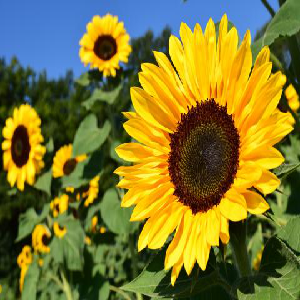

In [14]:
# run the inference function on your test image
img, class_index, class_probability = inference_function("sf.jpeg")

# name of the class the image belongs to
class_name = label_names[class_index]

print(class_name, class_probability)
img